In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

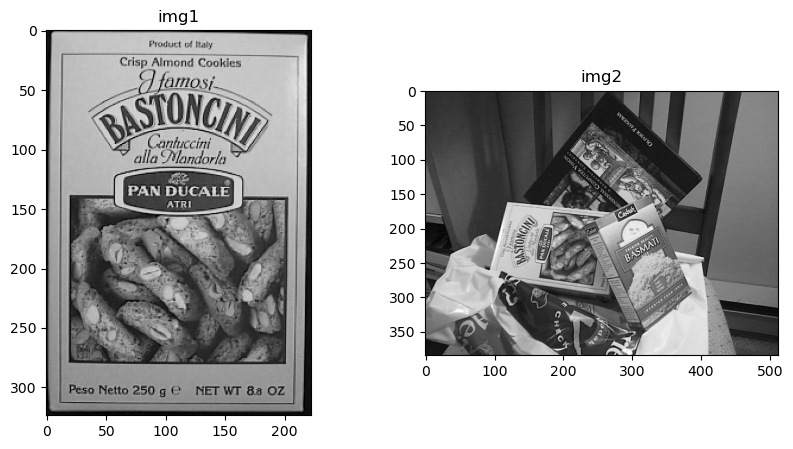

In [2]:
img1 = cv2.imread('box.png')
img2 = cv2.imread('box_in_scene.png')

img1 = cv2.rotate(img1, cv2.ROTATE_90_CLOCKWISE)

plt.figure(figsize=(10,5))
plt.subplot(121);plt.imshow(img1[...,::-1]);plt.title('img1');
plt.subplot(122);plt.imshow(img2[...,::-1]);plt.title('img2');

In [3]:
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)
print(des1.shape)
print(des2.shape)

(604, 128)
(969, 128)


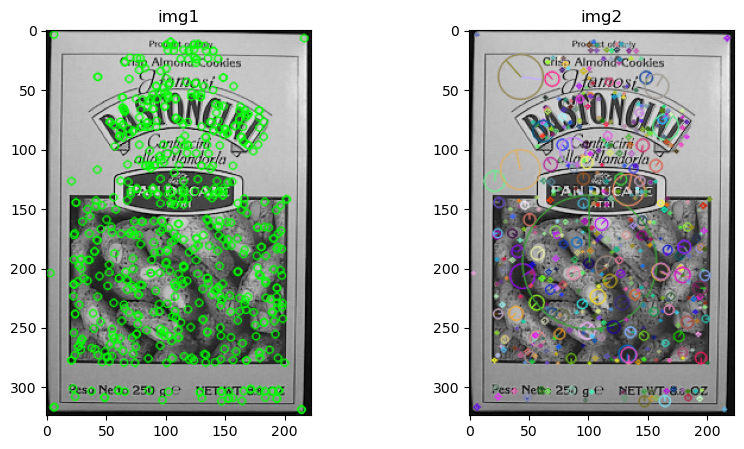

In [4]:
keypoints_without_size = np.copy(img1)

keypoints_with_size = np.copy(img1)

cv2.drawKeypoints(img1, kp1, keypoints_without_size, color=(0,255,0))
cv2.drawKeypoints(img1, kp1, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10,5))
plt.subplot(121);plt.imshow(keypoints_without_size[...,::-1]);plt.title('img1');
plt.subplot(122);plt.imshow(keypoints_with_size[...,::-1]);plt.title('img2');

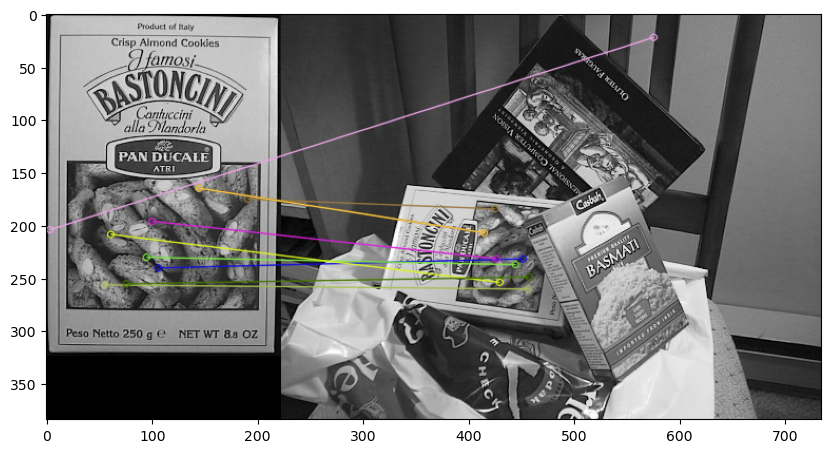


 Number of Matching keypoints between the Training and Query Images:  604


In [5]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

matches = bf.match(des1, des2)

matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(10,10))
plt.imshow(img3[...,::-1])
plt.show()
print("\n Number of Matching keypoints between the Training and Query Images: ", len(matches))

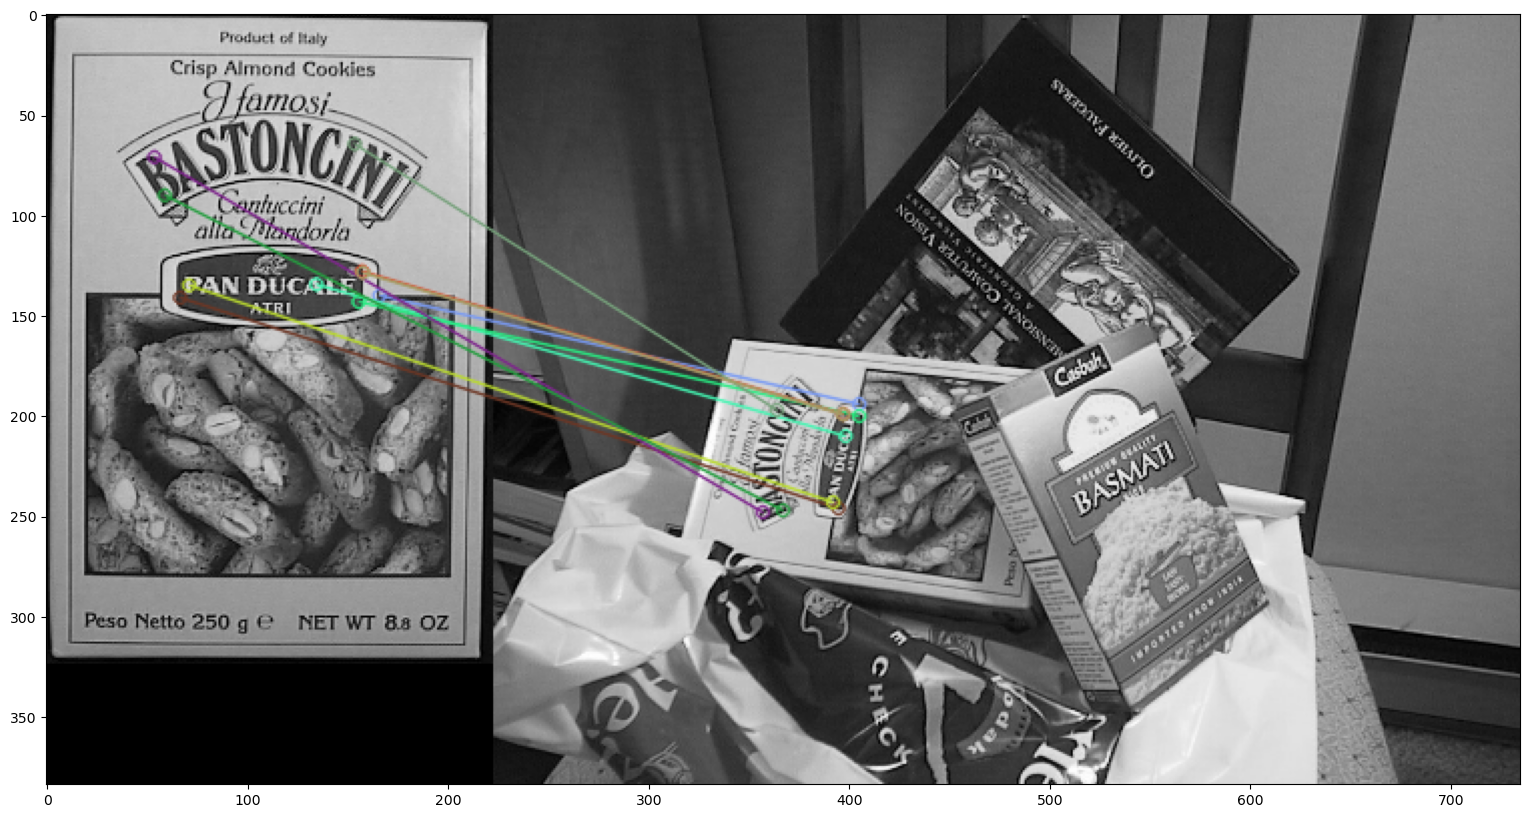


 Number of Matching keypoints between the Training and Query Images:  453


In [6]:
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck= False)

matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(20,10))
plt.imshow(img3[...,::-1])
plt.show()
print("\n Number of Matching keypoints between the Training and Query Images: ", len(matches))